In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

def signed_area(xy):
    x, y = zip(*xy)
    x = np.array(x)
    y = np.array(y)
    return 0.5 * np.sum(x[:-1]*y[1:] - x[1:]*y[:-1])

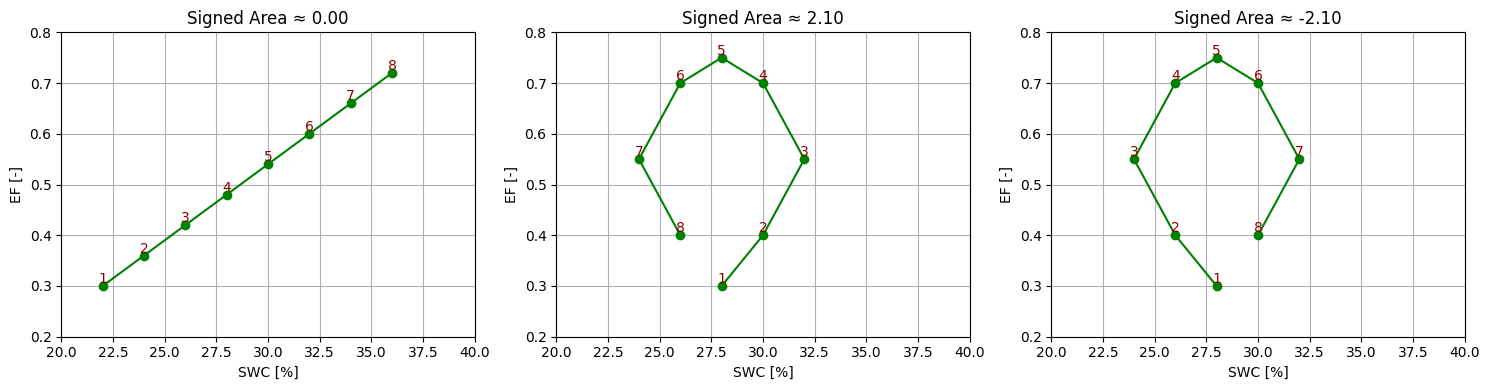

In [2]:
xy0 = [
 (22, 0.30), (24, 0.36), (26, 0.42), (28, 0.48),
 (30, 0.54), (32, 0.60), (34, 0.66), (36, 0.72)
]
xy1 = [
 (28, 0.30), (30, 0.40), (32, 0.55), (30, 0.70),
 (28, 0.75), (26, 0.70), (24, 0.55), (26, 0.40)
]
xy2 = [
 (28, 0.30), (26, 0.40), (24, 0.55), (26, 0.70),
 (28, 0.75), (30, 0.70), (32, 0.55), (30, 0.40)
]


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, xy in zip(axes, [xy0, xy1, xy2]):
    signed_area_val = signed_area(xy + [xy[0]]) # for closing a loop

    # scatter plot
    x, y = zip(*xy)
    ax.plot(x, y, '-o', color='green')
    for i, (xi, yi) in enumerate(xy):
        ax.text(xi, yi, str(i + 1), fontsize=10, ha='center', va='bottom', color='darkred')
        ax.set_title(f"Signed Area ≈ {signed_area_val:.2f}")
        ax.set_xlabel("SWC [%]")
        ax.set_ylabel("EF [-]")
        ax.set_xlim(20, 40)
        ax.set_ylim(0.2, 0.8)
        ax.grid(True)

plt.tight_layout()
plt.show()

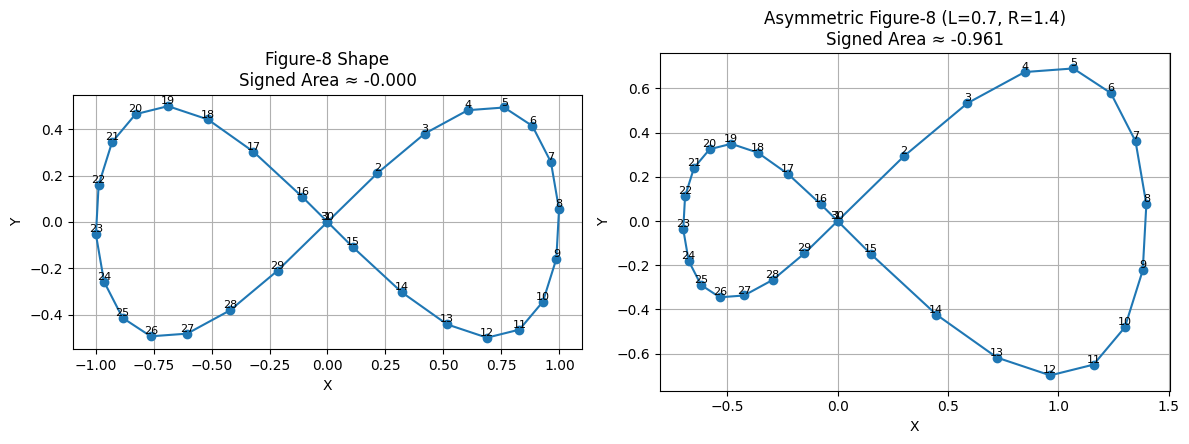

In [3]:
# ---------- figure-8 or infinity sign) ----------
t = np.linspace(0, 2*np.pi, 30)

x8 = np.sin(t)
y8 = np.sin(t) * np.cos(t)

xy8 = list(zip(x8, y8))
xy8.append(xy8[0])   # close loop

# Scaled
x = np.sin(t)
y = np.sin(t) * np.cos(t)
scale_L = 0.7   
scale_R = 1.4  

x_scaled = np.where(x < 0, x * scale_L, x * scale_R)
y_scaled = np.where(x < 0, y * scale_L, y * scale_R)

xy = list(zip(x_scaled, y_scaled))
xy.append(xy[0]) 


# ---------- Plot ----------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, xy, title in zip(
        axes,
        [xy8, xy],
        ["Figure-8 Shape", f"Asymmetric Figure-8 (L={scale_L}, R={scale_R})"]):

    area = signed_area(xy)

    x, y = zip(*xy[:-1])  # last is duplicate for closing loop
    ax.plot(x, y, '-o')

    # number labels
    for i, (xi, yi) in enumerate(xy[:-1]):
        ax.text(xi, yi, str(i+1), ha='center', va='bottom', fontsize=8)

    ax.set_title(f"{title}\nSigned Area ≈ {area:.3f}")
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

plt.tight_layout()
plt.show()
